In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting (graph plotting, not evil plotting)
import seaborn as sns

In [4]:
# Dictionary containing values for representing NaNs
na_other = {'perf_6_month_avg':-99, 'perf_12_month_avg':-99}
train_df= pd.read_csv('/Users/kgirish/desktop/train_supply.csv',na_values=na_other)
test_df = pd.read_csv('/Users/kgirish/desktop/test_supply.csv',na_values=na_other)

In [5]:
train_df.shape, test_df.shape

((1687861, 23), (242076, 23))

In [6]:
# Look at data types
train_df.dtypes

sku                   object
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [7]:
#Notes on data types
#The dataset contains a mix of numerical and non-numerical data. We should take a look at some of the values in the columns.

In [8]:
# A prelimiary look at the individual columns in the training set
# The first 5 rows
train_df.head()


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,Yes,No,No,Yes,No,No


In [12]:
# Some columns are not shown, so show them here
train_df.loc[0:4,'sales_9_month':'potential_issue']

,sales_9_month,min_bank,potential_issue
0,0.0,0.0,No
1,0.0,0.0,No
2,0.0,0.0,No
3,0.0,1.0,No
4,4.0,2.0,No


In [13]:
# The last 5 rows of the training dataset
train_df.tail()


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,NaN,NaN,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Notes on the last row of the dataset
#The last row of the training dataset is not a valid sample and should be removed. We should check whether the same problem is in the test data set, and if so fix it too.

In [15]:
# The last 5 rows of the testing dataset
test_df.tail()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
242071,3526988,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242072,3526989,13.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242073,3526990,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242074,3526991,2913.0,12.0,0.0,0.0,0.0,0.0,0.0,30.0,88.0,...,0.0,0.48,0.48,0.0,Yes,No,No,Yes,No,No
242075,(242075 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Summarise the numerical data in train_df
train_df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.558382e+06,1.565810e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,7.823812e-01,7.769763e-01,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.370141e-01,2.304902e-01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01,6.900000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.500000e-01,8.300000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.600000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [17]:
# Summarise the non-numerical data in train_df
train_df.describe(include=['O'])

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687861,1687860,1687860,1687860,1687860,1687860,1687860,1687860
unique,1687861,2,2,2,2,2,2,2
top,3280661,No,No,No,No,Yes,No,No
freq,1,1686953,1300377,1687615,1484026,1626774,1687129,1676567


In [19]:
## 1 -step make the list of features which has missing values
features_with_na=[features for features in train_df.columns if train_df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(train_df[feature].isnull().mean(), 4),  ' % missing values')

lead_time 0.0598  % missing values
perf_6_month_avg 0.0767  % missing values
perf_12_month_avg 0.0723  % missing values


In [20]:
## 1 -step make the list of features which has missing values
features_with_na=[features for features in test_df.columns if test_df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(test_df[feature].isnull().mean(), 4),  ' % missing values')

lead_time 0.0608  % missing values
perf_6_month_avg 0.0789  % missing values
perf_12_month_avg 0.0743  % missing values


In [24]:

train_df['went_on_backorder'].value_counts()

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

Notes on the data overall
The data are a mix of string and floating point values.

The sku has a unique value for each row, so it is the index column and should be dropped.

The features with string values, apart from sku, are categorical features that only contain 'yes' and 'no'. They can be changed to represent the same information in numerical values.

The numerical features have different scales, which may be a problem for some machine learning algorithms. The features should be rescaled to have similar scale.

There are missing values in lead_time, perf_6_month_avg and perf_12_month_avg. These missing values need to be replaced or the samples with missing values need to be removed.

lead_time has (1687860 - 1586967 = 100,893) (5.98%) missing values

perf_6_month_avg has (1687860 - 1558382 = 129,478) (7.67%) missing values
perf_12_month_avg has (1687860 - 1565810 = 122,050) (7.23%) missing values

The last row is not a valid sample in both the training and testing datasets, and thus should be dropped.

There are 1,676,567 samples when the product did not go on backorder. There are 11,293 (0.67%) samples when the product did go on backorder.

In [25]:
#%% Data cleaning

# Drop the sku column
train_df = train_df.drop('sku', axis=1)
test_df = test_df.drop('sku', axis=1)

In [26]:
# Drop the last row
train_df = train_df[:-1]
test_df = test_df[:-1]


In [28]:
categorical_features=[feature for feature in train_df.columns if train_df[feature].dtypes=='O']
categorical_features

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [29]:
# Change categorical features from string to numerical
Cols_for_str_to_bool = ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk',
                        'stop_auto_buy', 'rev_stop', 'went_on_backorder']

for col_name in Cols_for_str_to_bool:
    train_df[col_name] = train_df[col_name].map({'No':0, 'Yes':1})
    test_df[col_name] = test_df[col_name].map({'No':0, 'Yes':1})

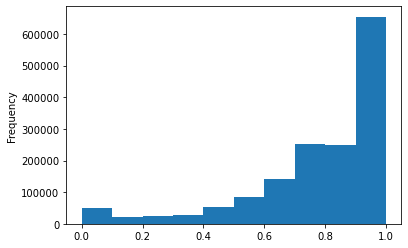

In [30]:

# Look at histogram of perf_6_month_avg
train_df.perf_6_month_avg.plot.hist()

Notes on histogram for perf_6_month_avg
The distribution of performance values is left skewed. Most values fall in the range 0.7-1. It should be OK to assume that samples with missing performance values will have values close to the median value.

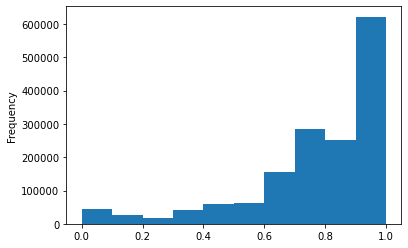

In [31]:
# Look at histogram of perf_12_month_avg
train_df.perf_12_month_avg.plot.hist()


Notes on histogram for perf_12_month_avg
This is similar to the histogram for perf_6_month_avg. The distribution of performance values is left skewed. Most values fall in the range 0.7-1. The same assumption should be OK.

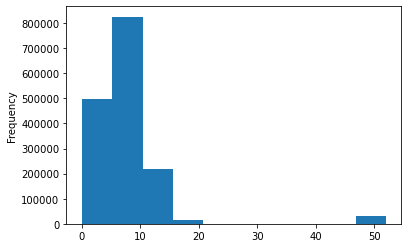

In [32]:
# Look at histogram of lead_time
train_df.lead_time.plot.hist()

Notes on histogram for lead_time
The distribution of lead times is right skewed. Most lead times fall in the range 0-20. It should be OK to assume that samples with missing lead times will have lead times close to the median lead time.

In [33]:
# Replace NaNs in the dataset

# perf_6_month_avg
train_df.perf_6_month_avg = train_df.perf_6_month_avg.fillna(train_df.perf_6_month_avg.median())
test_df.perf_6_month_avg = test_df.perf_6_month_avg.fillna(test_df.perf_6_month_avg.median())

# perf_12_month_avg
train_df.perf_12_month_avg = train_df.perf_6_month_avg.fillna(train_df.perf_12_month_avg.median())
test_df.perf_12_month_avg = test_df.perf_6_month_avg.fillna(test_df.perf_12_month_avg.median())

# lead_time
train_df.lead_time = train_df.lead_time.fillna(train_df.lead_time.median())
test_df.lead_time = test_df.lead_time.fillna(test_df.lead_time.median())

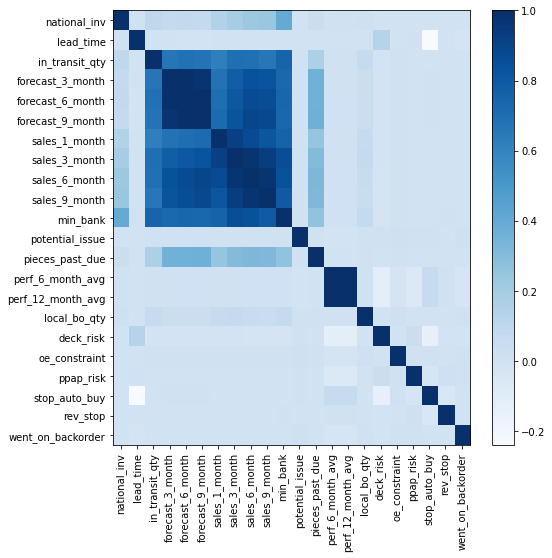

In [34]:
#%% Data visualisation

# Look at correlations between features and the label

# Set figure size 
fig = plt.figure(figsize=(8,8)) 

# Plot a correlation matrix
plt.imshow(train_df.corr(), cmap=plt.cm.Blues, interpolation='nearest', aspect='auto')

# Display legend showing what the colours mean
plt.colorbar()

# Add tick marks and feature names for ease of reading
tick_marks = [i for i in range(len(train_df.columns))]
plt.xticks(tick_marks, train_df.columns, rotation='vertical')
plt.yticks(tick_marks, train_df.columns)

# Show the plot
plt.show()

Notes on correlation matrix
The correlation matrix shows that the quantity in transit, the forecast sales over 3/6/9 months, the actual sales over the previous 1/3/6/9 months, and minimum recommended stock level are highly correlated. This is not surprising because if an item had high real sales over the last 1/3/6/9 months, then it is reasonable for the forecast sales over the next 3/6/9 months to also be high. If forecast sales are high, then it would be useful to have more of the stock in hand and to have more shipped in.

Besides that, the average performance over the last 6 months strongly correlates with that over the last 12 months.

Overall, the correlation matrix suggests that the number of features used for predicting whether an item goes on back order can be lower than the number of features in the dataset. In other words, the dimensionality of the problem may be reduced.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


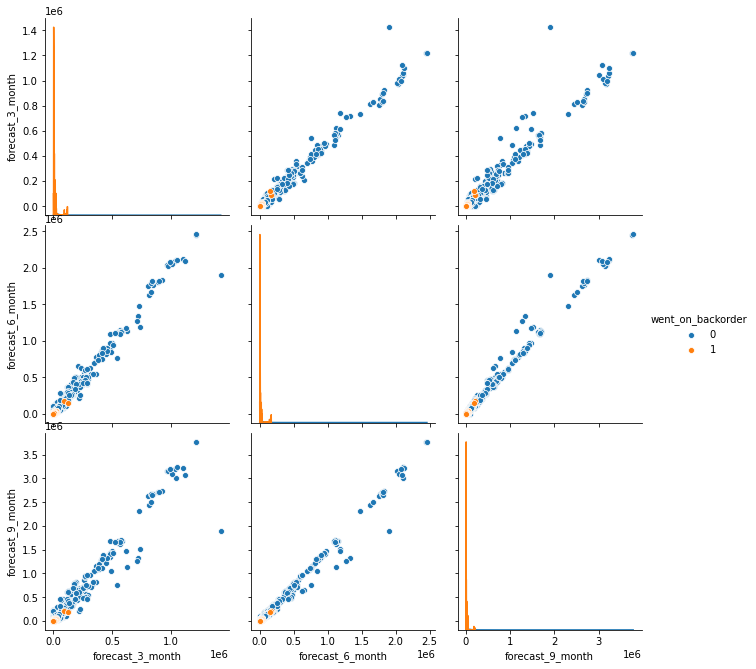

In [36]:
# Take a closer look at correlations with scatter plots.

# Forecast columns
forecasts = ['forecast_3_month','forecast_6_month', 'forecast_9_month']

# Pair-wise scatter plot for the forecasts
sns.pairplot(train_df, vars=forecasts, hue='went_on_backorder', size=3)

# Show the plot
plt.show()

Notes on the forecasts' pair-wise scatter plots
The forecast values over each time frame have very close linear correlation with each other, as expected from the correlation matrix. The forecast values cover a wide range from 0 to over 1 million. Backorders only occur when the forecast value is low.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


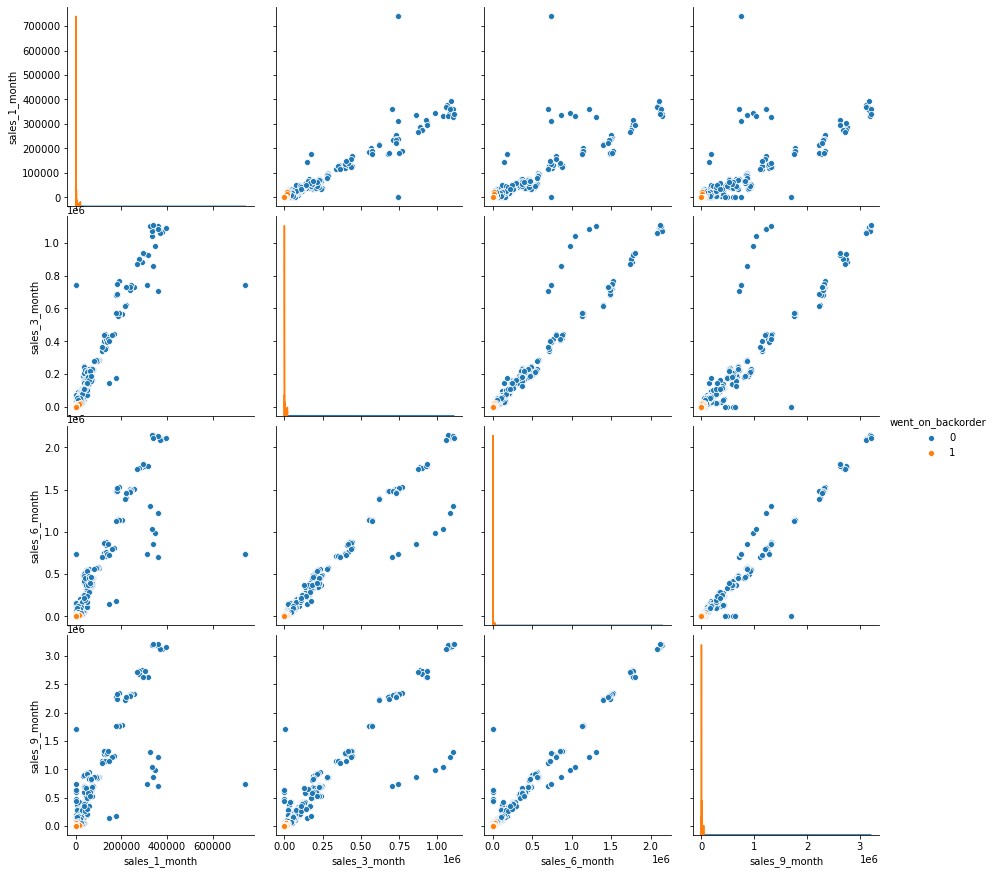

In [37]:
# Do a pair-wise scatter plot for sales
sales = ['sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month']
sns.pairplot(train_df, vars=sales, hue='went_on_backorder', size=3)
plt.show()

Notes on the sales' pair-wise scatter plots
The sales over each time frame have good linear correlations with each other, as expected from the correlation matrix. There are some instances when the sales at different time frames fall away from the linear correlation. The sales range from 0 to over 1 million. Backorders only occur when sales are low.

In [39]:
# Do some data separation for more plots

# Separate data by going on backorder or not
no_bo = train_df.loc[train_df['went_on_backorder'] == 0]       
is_bo = train_df.loc[train_df['went_on_backorder'] == 1]


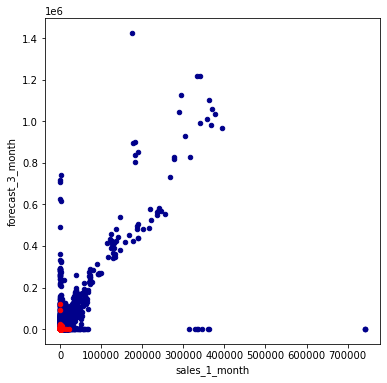

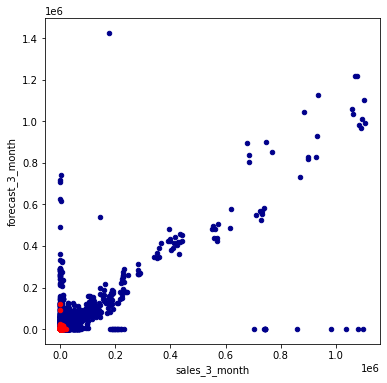

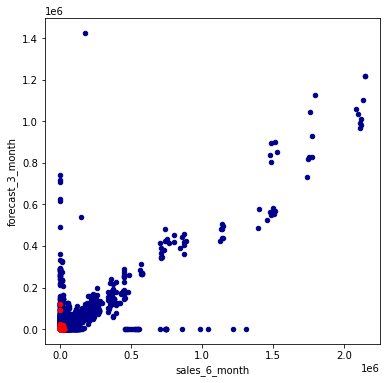

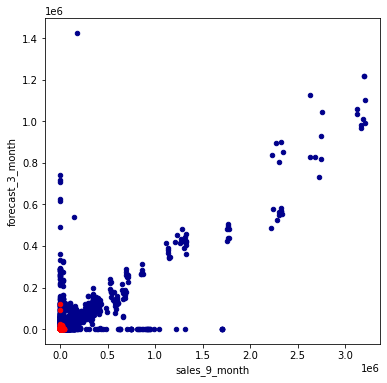

In [40]:
# Make scatter plots of the 3-month forecast against each of the sales
for col in sales:
    fig = plt.figure(figsize=(6, 6))
    ax = fig.gca()
    no_bo.plot(kind='scatter', x=col, y='forecast_3_month', ax=ax, color='DarkBlue', legend=True)
    is_bo.plot(kind='scatter', x=col, y='forecast_3_month', ax=ax, color='Red')

Notes on forecast and sales scatter plots
There is a good linear relationship between sales and forecasts, as expected from the correlation matrix. Backorder happens when sales and forecasts are low.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


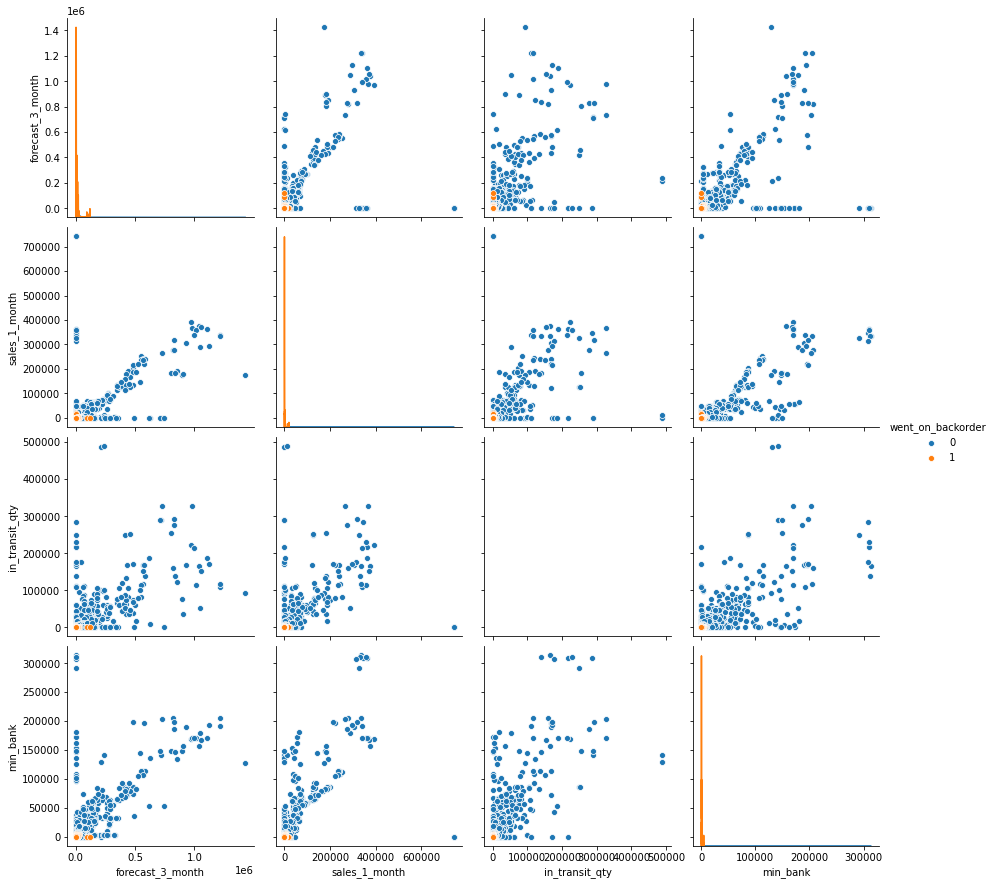

In [42]:
# Look at forecast, sales, in transit and recommended stock level in a pair-wise scatter plot
feature_set_1 = ['forecast_3_month', 'sales_1_month', 'in_transit_qty', 'min_bank']
sns.pairplot(train_df, vars=feature_set_1, hue='went_on_backorder', size=3)
plt.show()

Notes on the pair-wise scatter plot of forecast, sales, in transit and recommended stock level
The scatter plots show okay linear relationships between forecast, sales, in transit and recommended stock level. All the features range from 0 to over 300,000. Backorders only occur when the features are at low values.

Due to the good correlations and sufficiently linear relationships between these features, they will all be represented by a single feature in the machine learning models. The feature chosen is sales_1_month. This is because past sales is measured, whereas the quantity in transit, recommended minimum stock and forecasts are likely derived from past sales.

Notes on the performance columns
There is a perfect linear relationship between perf_6_month_avg and perf_12_month_avg. As such, only one of the two features is enough for use in a machine learning model. Backorders occur for all performance values.

Machine learning models

In [46]:
from sklearn.preprocessing import MinMaxScaler       # Preprocessing method
from sklearn.neighbors import KNeighborsClassifier   # K-Nearest Neighbours Classifier model
from sklearn.svm import SVC                          # Support Vector Classifier model
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier model

In [47]:
#%% Machine learning models

# Filter out the data that will be used

# Features chosen
features = ['national_inv', 'lead_time', 'sales_1_month', 'pieces_past_due', 'perf_6_month_avg',
            'local_bo_qty', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']

reduced_train_df = train_df[features]
reduced_test_df = test_df[features]

# Set labels
train_label = train_df['went_on_backorder']
test_label = test_df['went_on_backorder']

In [48]:
# Change scale of data

# Use MinMaxScaler to convert features to range 0-1
# The label is already in the range 0-1, so it won't be affected by this.
pp_method = MinMaxScaler()
pp_method.fit(reduced_train_df)

reduced_train_df = pp_method.transform(reduced_train_df)
reduced_train_df = pd.DataFrame(reduced_train_df, columns=features)

reduced_test_df = pp_method.transform(reduced_test_df)
reduced_test_df = pd.DataFrame(reduced_test_df, columns=features)